## Model evaluation :
is a critical step in assessing the performance and reliability of a classifier model. It involves measuring how well the model performs on unseen data and understanding its strengths and weaknesses.

## 1. Performance Metrics:
Accuracy: The proportion of correctly classified instances out of the total instances.
Precision: The proportion of true positive predictions among all positive predictions.
Recall (Sensitivity): The proportion of true positive predictions among all actual positives.
F1-score: The harmonic mean of precision and recall, which balances between precision and recall.
Confusion Matrix: A matrix showing the counts of true positive, true negative, false positive, and false negative predictions.
ROC Curve: Receiver Operating Characteristic curve showing the trade-off between true positive rate and false positive rate.
AUC-ROC: Area Under the ROC Curve, which measures the model's ability to distinguish between classes.
Precision-Recall Curve: A curve showing the trade-off between precision and recall at different classification thresholds.

## 2. Model Evaluation Process:   
Model Prediction: Use the trained classifier model to make predictions on the testing set.
Calculate Performance Metrics: Compute accuracy, precision, recall, F1-score, and other relevant metrics using the predicted labels and true labels from the testing set.
Visualize Results: Plot the confusion matrix, ROC curve, and precision-recall curve to gain insights into the model's performance.
Adjust Threshold (if necessary): If the classifier model outputs probabilities, adjust the classification threshold to optimize the desired metric (e.g., precision, recall).
Cross-Validation: Perform k-fold cross-validation to assess the model's robustness and generalization ability.

## 3. Interpretation and Improvement:
Interpret Results: Analyze the performance metrics and visualizations to understand the classifier model's strengths and weaknesses.
Model Improvement: Iterate on the model by fine-tuning hyperparameters, feature engineering, or trying different algorithms to improve performance.
Feature Importance: Assess the importance of input features in making predictions using techniques like permutation importance or feature importance plots.

## 4. Business Impact:
Decision Making: Use the insights from model evaluation to make informed decisions about deploying the model in production or making changes to the data or model architecture.
Monitoring and Maintenance: Continuously monitor the model's performance in the production environment and update it as needed to ensure its effectiveness over time.

In [1]:
# Import the required libarary
from tensorflow.keras.models import load_model
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix,roc_auc_score,precision_score,recall_score
from sklearn.metrics import f1_score,roc_curve,precision_recall_curve

In [2]:
# Get the current directory
current_dir = os.getcwd()

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)

# Print the parent directory
print("Parent Directory:", parent_dir)

Parent Directory: E:\upgrade_capston_project-main


In [3]:
# Load the saved model
models = load_model(parent_dir+"/models/vgg16_model.keras")

In [4]:
#Load the test data
test_dataset = tf.data.Dataset.load(parent_dir+'/datasets/processed_dataset/vgg16_test_datasets.tfrecord')

## Model Accuracy and Loss

In [5]:
loss , accuracy = models.evaluate(test_dataset)

7/7 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.9138 - loss: 0.2795


In [6]:
print("Accuracy:", accuracy)
print("Loss:", loss)

Accuracy: 0.9196428656578064
Loss: 0.2433212548494339


In [7]:
prediction =[]
actual_labels=[]
for image_batch,label_batch in test_dataset :
    predictions = models.predict_on_batch(image_batch).flatten()
    predictions = tf.nn.sigmoid(predictions)
    predictions = tf.where(predictions<0.5,0,1)
    actual_labels.append(label_batch.numpy())
    prediction.append(predictions.numpy())


In [8]:
actual_labels_list = list(itertools.chain.from_iterable(actual_labels))

In [9]:
prediction_list = list(itertools.chain.from_iterable(prediction))

In [10]:
y_test_n = actual_labels_list

In [11]:
y_pred = prediction_list

In [12]:
# Calculate performance metrics

accuracy = accuracy_score(y_test_n, y_pred)
precision = precision_score(y_test_n, y_pred)
recall = recall_score(y_test_n, y_pred)
f1 = f1_score(y_test_n, y_pred)
conf_matrix = confusion_matrix(y_test_n, y_pred)
roc_auc = roc_auc_score(y_test_n, y_pred)
fpr, tpr, _ = roc_curve(y_test_n, y_pred)
precision, recall, _ = precision_recall_curve(y_test_n, y_pred)

In [13]:
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9241071428571429
Precision: [0.45089286 0.875      1.        ]
Recall: [1.         0.97029703 0.        ]
F1-score: 0.92018779342723
Confusion Matrix:
 [[109  14]
 [  3  98]]
ROC AUC Score: 0.9282379457457941


In [14]:
print(classification_report(y_test_n, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       123
           1       0.88      0.97      0.92       101

    accuracy                           0.92       224
   macro avg       0.92      0.93      0.92       224
weighted avg       0.93      0.92      0.92       224



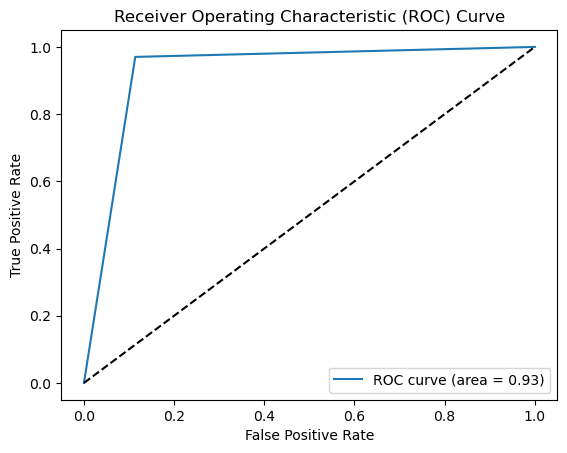

In [15]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(parent_dir+'\\visuals\\VGG16_ROC_Curve')
plt.show()

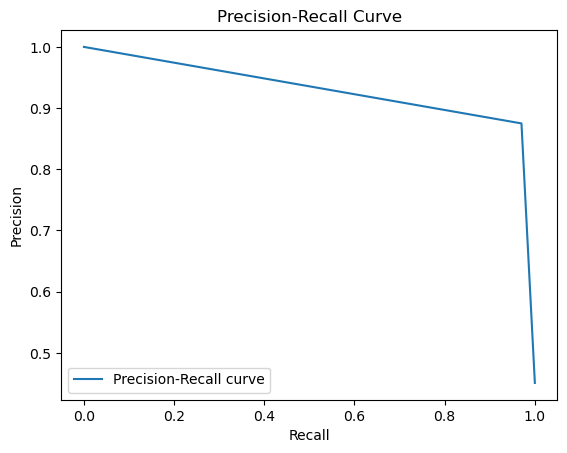

In [16]:
# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig(parent_dir+'\\visuals\\VGG16_Precision-Recall Curve')
plt.show()

In [17]:
class_name = ['defective','good']

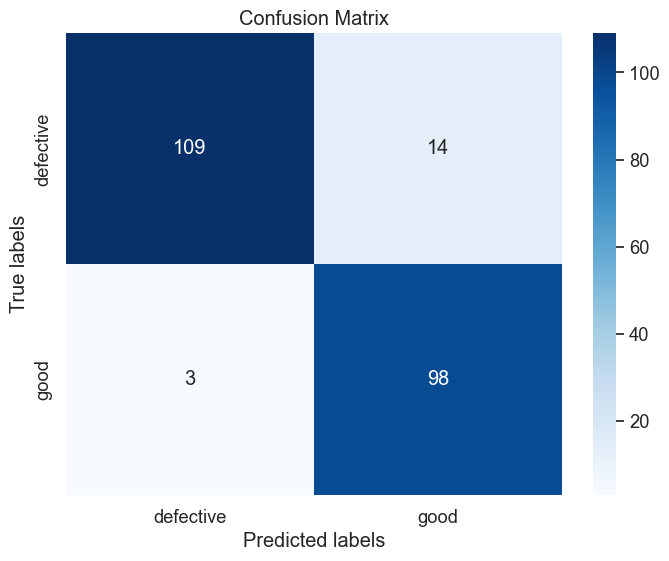

In [18]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig(parent_dir+'\\visuals\\VGg16_XGB_Confusion Matrix')
plt.show()

In [19]:
# Predict the image labels from test data

[0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0]


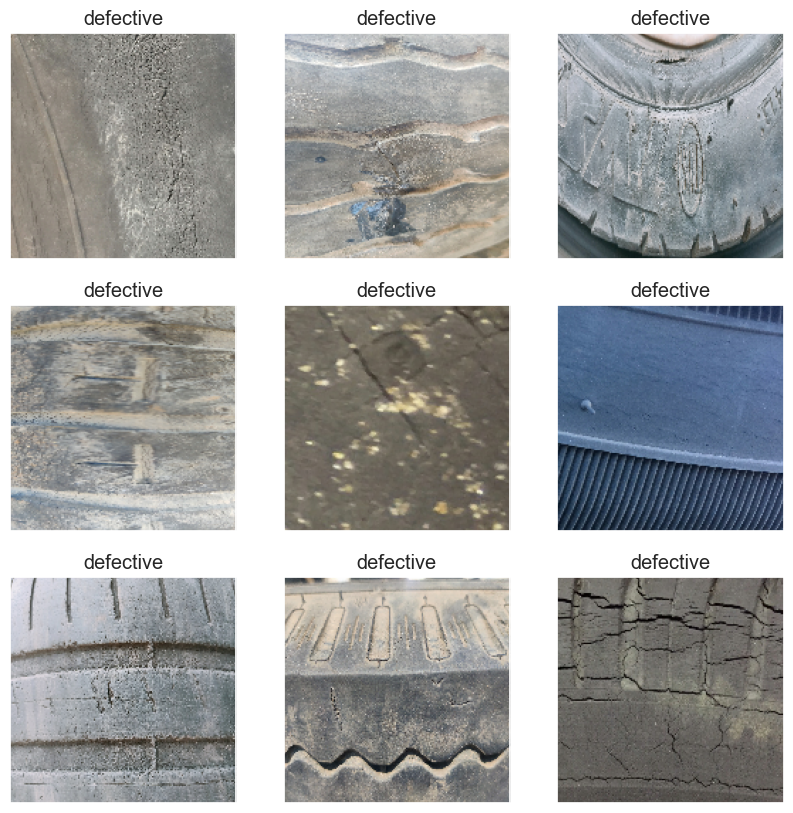

In [20]:
image_batch,label_batch = test_dataset.as_numpy_iterator().next()
predictions = models.predict_on_batch(image_batch).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions<0.5,0,1)

print(predictions.numpy())
print(label_batch)

plt.figure(figsize=(10,10))

for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].astype('uint8'))
        plt.title(class_name[predictions[i]])
        plt.xticks([])
        plt.yticks([])
        



## Interpretation and Improvement: 
92% is good accuracy to consider this model as final model , so we have two models with good accuracy . we will finaloze the result with some random tyre image test.

Business Impact : Manufacturing facilities face significant challenges in detecting faulty tires during production. Defective tires can lead to safety hazards, product recalls, and financial losses. FaultFindy addresses this issue by leveraging historical data and sensor inputs to predict faulty tires before they leave the production line.